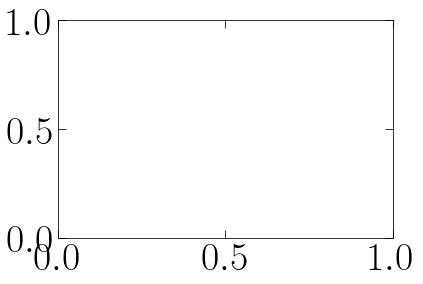

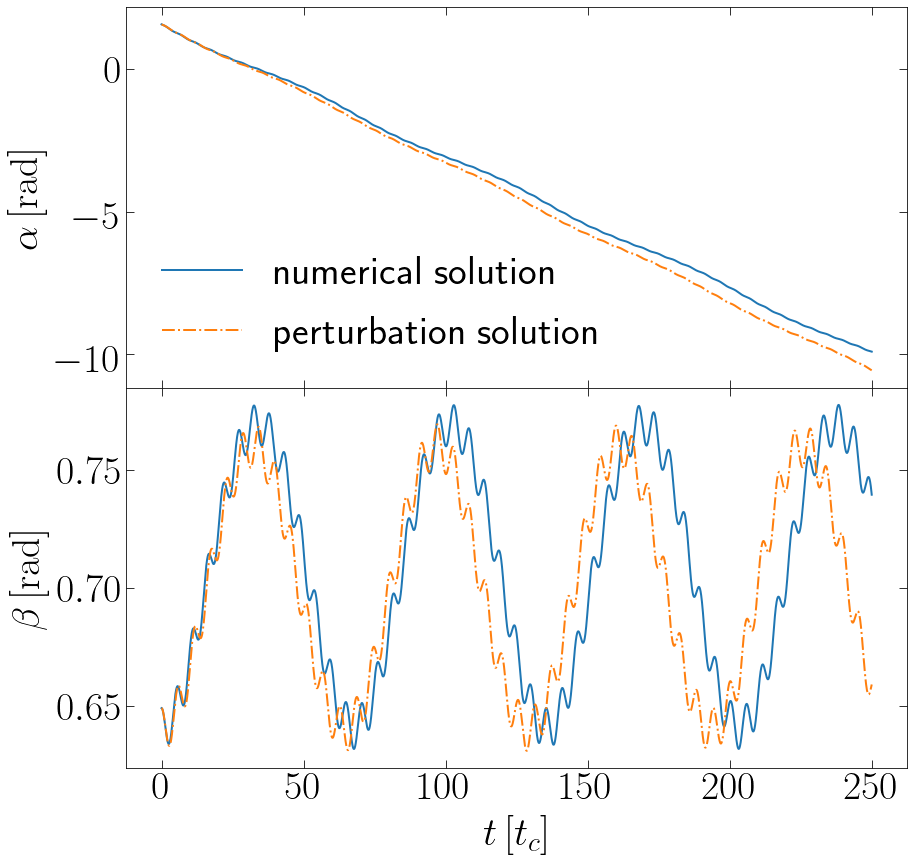

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from numpy import log10 as lg
from numpy import pi as pi
from scipy.interpolate import interp1d as sp_interp1d
from scipy.interpolate import splrep,splev
from scipy.integrate import odeint
from scipy.integrate import ode
import warnings
import timeit
import scipy.optimize as opt
from matplotlib import cm
from astropy import constants as const
from astropy import units as u
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


import matplotlib.font_manager as font_manager

plt.rcParams['xtick.labelsize'] = 40
plt.rcParams['ytick.labelsize'] = 40
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.labelpad'] = 8.0
plt.rcParams['figure.constrained_layout.h_pad'] = 0
plt.rcParams['text.usetex'] = True
plt.rc('text', usetex=True)
plt.tick_params(axis='both', which='minor', labelsize=18)
import matplotlib.ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)



data = np.genfromtxt('sp1.dat')
c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10 = data[:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7], data[:, 8], data[:, 9], data[:, 10]

# Ntrim = 10000 (sp1, sp2), 5000 (tp1), 3333 (tp2)
Ntrim = 10000
c01=c0[:Ntrim]
c11=c1[:Ntrim]
c21=c2[:Ntrim]
c31=c3[:Ntrim]
c41=c4[:Ntrim]


fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(14,14),sharex=True, sharey=False)
plt.subplots_adjust(hspace=0.0)

ax1.set_ylabel(r'$ \alpha \, [\rm rad]$', fontsize=40)
ax2.set_ylabel(r'$ \beta \, [\rm rad]$', fontsize=40)
ax2.set_xlabel(r'$t \,[t_c]$', fontsize=40)
    
ax1.plot(c01, c11, label='numerical solution', linewidth=2)
ax1.plot(c01, c21, linestyle='-.', label='perturbation solution', linewidth=2)
ax2.plot(c01, c31, linewidth=2)
ax2.plot(c01, c41, linestyle='-.', linewidth=2)

ax1.legend(loc='best', fontsize=40, frameon=False)




plt.savefig("fig1.pdf", format='pdf', bbox_inches="tight")

plt.show()

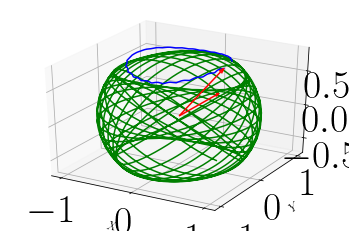

In [5]:
data = np.genfromtxt('sp1.dat')
c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10 = data[:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7], data[:, 8], data[:, 9], data[:, 10]

# Ntrim = 5000 (sp1), 8000 (sp2), 1000 (tp1), 5000 (tp2)
Ntrim = 5000
c51=c5[:Ntrim]
c61=c6[:Ntrim]
c71=c7[:Ntrim]
c81=c8[:Ntrim]
c91=c9[:Ntrim]
c101=c10[:Ntrim]

fig = plt.figure()
ax = fig.gca(projection='3d')



ax.set_xlabel(r'$ X $', fontsize=12)
ax.set_ylabel(r'$ Y $', fontsize=12)
ax.set_zlabel(r'$ Z $', fontsize=12)
    

alr = 0.08

ax.quiver(0, 0, 0, c8[0], c9[0], c10[0], color='red', arrow_length_ratio = alr)
ax.quiver(0, 0, 0, c5[0], c6[0], c7[0], color='red', arrow_length_ratio = alr, length = 1)
#ax.quiver(0, 0, 0, c9[0]*c7[0]-c10[0]*c6[0], c10[0]*c5[0]-c8[0]*c7[0], c8[0]*c6[0]-c9[0]*c5[0], color='red', arrow_length_ratio = alr, length = 0.4)

#ax.quiver(0, 0, 0, c8[Ntrim-1], c9[Ntrim-1], c10[Ntrim-1], color='red', arrow_length_ratio = alr, linestyle = ':')
#ax.quiver(0, 0, 0, c5[Ntrim-1], c6[Ntrim-1], c7[Ntrim-1], color='red', arrow_length_ratio = alr, length = 1, linestyle = ':')
#ax.quiver(0, 0, 0, c9[Ntrim-1]*c7[Ntrim-1]-c10[Ntrim-1]*c6[Ntrim-1], c10[Ntrim-1]*c5[Ntrim-1]-c8[Ntrim-1]*c7[Ntrim-1], c8[Ntrim-1]*c6[Ntrim-1]-c9[Ntrim-1]*c5[Ntrim-1], color='green', arrow_length_ratio = alr, length = 0.4)

ax.plot(c51,c61,c71, color='green' )
ax.plot(c81,c91,c101, color='blue' )




plt.savefig("fig2.pdf", format='pdf', bbox_inches="tight")

plt.show()

